In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import display, HTML

In [3]:
df=pd.read_csv('..\datasets\Grade_Set_1.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\benso\AppData\Local\Temp\ipykernel_14228\2096150994.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('..\datasets\Grade_Set_1.csv')


,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79


<Axes: title={'center': 'Grade vs Hour studied'}, xlabel='Hours_Studied', ylabel='Test_Grade'>

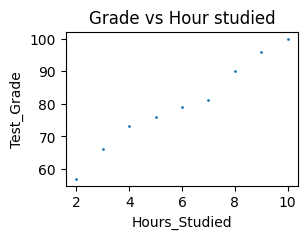

In [4]:
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade',
        title='Grade vs Hour studied', figsize=(3,2),s=1)

In [5]:
df.corr()

,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


In [6]:
#import Linear Regression Model
import sklearn.linear_model as lm

In [7]:
#create a Linear Regression model
lr = lm.LinearRegression()

In [8]:
X=df.Hours_Studied.to_numpy().reshape(-1,1)
y=df.Test_Grade.to_numpy()
X,y

(array([[ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([ 57,  66,  73,  76,  79,  81,  90,  96, 100], dtype=int64))

In [9]:
lr.fit(X,y)

LinearRegression()

In [10]:
print("Inteceptt: ", lr.intercept_)
print("coefficient: ", lr.coef_)

Inteceptt:  49.67777777777776
coefficient:  [5.01666667]


In [11]:
print("Previsão de um valor: ", lr.predict([[6]]))

Previsão de um valor:  [79.77777778]


Text(0, 0.5, 'Test grade')

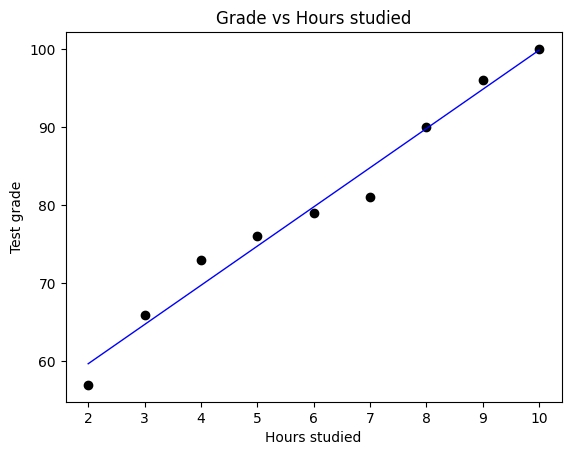

In [12]:
# plot the fitted line
plt.scatter(X,y,color="black")
plt.plot(X, lr.predict(X), color="blue", linewidth=1)
plt.title("Grade vs Hours studied")
plt.xlabel("Hours studied")
plt.ylabel("Test grade")

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse

In [14]:
#adcionar coluna com previsão do dataframe
df['Pred']=lr.predict(X)
df

,Hours_Studied,Test_Grade,Pred
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [15]:
print("R2: ", r2_score(y, df.Pred))
print("MAE: ", mae(y, df.Pred))
print("MSE: ", mse(y, df.Pred))
print("RMSE:", np.sqrt(mse(y, df.Pred)))

R2:  0.9757431074095347
MAE:  1.618518518518523
MSE:  4.170987654320986
RMSE: 2.0422995995497297


# Outro exemplo

In [16]:
X2=2*np.random.rand(100)
y2=4+3*X2 + np.random.randn(100)

df2=pd.DataFrame({"X":X2, "y":y2})
df2

,X,y
0,0.232364,5.240197
1,1.595963,7.582832
2,0.327780,3.866843
3,1.811884,11.461793
4,1.537075,8.303895
...,...,...
95,1.220723,5.748675
96,1.225843,5.733789
97,1.415361,6.754203
98,1.488030,8.490089


<Axes: title={'center': 'Valores sintetizados'}, xlabel='X', ylabel='y'>

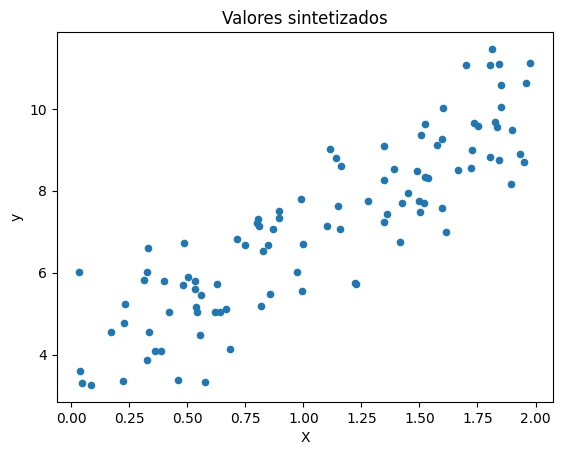

In [17]:
# scatter plot do df2
df2.plot(kind="scatter", x='X', y='y',title='Valores sintetizados')

In [18]:
df2.corr()

,X,y
X,1.000000,0.879808
y,0.879808,1.000000


In [19]:
lr2=lm.LinearRegression()

In [20]:
# train the lr2
lr2.fit(X2.reshape(-1,1),y2)

LinearRegression()

Text(0, 0.5, 'y')

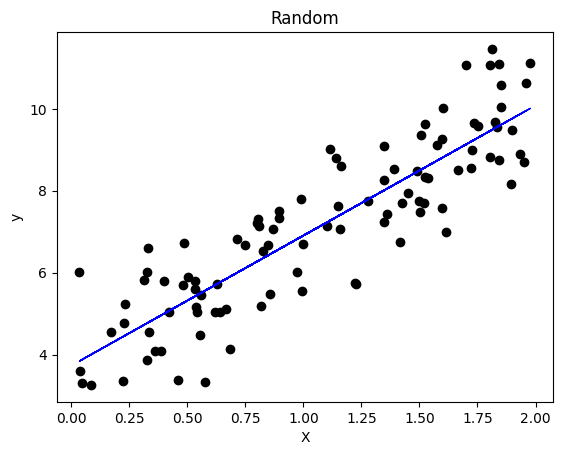

In [21]:
# plot the fitted line
plt.scatter(X2,y2,color="black")
plt.plot(X2, lr2.predict(X2.reshape(-1,1)), color="blue", linewidth=1)
plt.title("Random")
plt.xlabel("X")
plt.ylabel("y")

In [22]:
df2['Pred']=lr2.predict(X2.reshape(-1,1))
df2

,X,y,Pred
0,0.232364,5.240197,4.468781
1,1.595963,7.582832,8.799512
2,0.327780,3.866843,4.771818
3,1.811884,11.461793,9.485267
4,1.537075,8.303895,8.612485
...,...,...,...
95,1.220723,5.748675,7.607764
96,1.225843,5.733789,7.624027
97,1.415361,6.754203,8.225925
98,1.488030,8.490089,8.456719


In [23]:
print("R2: ", r2_score(y2, df2.Pred))
print("MAE: ", mae(y2, df2.Pred))
print("MSE: ", mse(y2, df2.Pred))
print("RMSE:", np.sqrt(mse(y2, df2.Pred)))

R2:  0.7740622652631676
MAE:  0.8132939518785953
MSE:  0.9651769421485977
RMSE: 0.9824341922737613
